In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec

In [3]:
def make_colorbar(composites):
    params = []
    # for comp in composites:
    # 	params.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
    # norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=len(composites) + 1.)
    c_m = matplotlib.cm.plasma
    # c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])

    return s_m

In [4]:
def comparison_plot(composites):

#     plt.style.use('ggplot')
    colors = [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])]
    h = [3,1,1,1,1,1,1]
    font = {'family' : 'serif',
        'color'  : 'black',
        'size'   : 25,
        }

#     gs = gridspec.GridSpec(7, 1, height_ratios=h, hspace = .001)
#     fig = plt.figure(num = 1, dpi = 100, figsize = [10,10])
    fig = plt.figure(num = 1, dpi = 100, figsize = [10,8])
    s_m = make_colorbar(composites)
    lw = 3

    composites, scales = composite.optimize_scales(composites, composites[0], True)
    
    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
    i = 0
    k = 1
    for comp in composites:
        # param = np.average(comp.dm15_array[comp.x1:comp.x2])
        param = k

#         rel_flux = plt.subplot(gs[0])
        rel_flux = plt.subplot(111)
#         plt.setp(rel_flux.get_xticklabels(), visible=False)
        plt.ylabel('Relative Flux', fontdict = font)
#         rel_flux.axes.get_yaxis().set_ticks([])
        # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], color = s_m.to_rgba(param))
        plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))
        if len(comp.low_conf) > 0 and len(comp.up_conf) > 0:
            plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2], 
                             comp.up_conf[comp.x1:comp.x2], color = s_m.to_rgba(param), alpha = 0.5)
            # plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2], 
            # 	             comp.up_conf[comp.x1:comp.x2], color = colors[i%len(colors)], alpha = 0.5)

#         var = plt.subplot(gs[1], sharex = rel_flux)
#         plt.setp(var.get_xticklabels(), visible=False)
#         plt.ylabel('Variance', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.ivar[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.ivar[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         res = plt.subplot(gs[2], sharex = rel_flux)
#         plt.setp(res.get_xticklabels(), visible=False)
#         plt.ylabel('Residuals', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))
#         if len(comp.low_conf) > 0 and len(comp.up_conf) > 0:
#             low_resid = comp.low_conf[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2]
#             up_resid = comp.up_conf[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2]
#             plt.fill_between(comp.wavelength[comp.x1:comp.x2], low_resid, up_resid, color = s_m.to_rgba(param), alpha = 0.5)
#             # plt.fill_between(comp.wavelength[comp.x1:comp.x2], low_resid, up_resid, color = colors[i%len(colors)], alpha = 0.5)

#         spec = plt.subplot(gs[3], sharex = rel_flux)
#         plt.setp(spec.get_xticklabels(), visible=False)
#         plt.ylabel('Spectra/Bin', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.spec_bin[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.spec_bin[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         phase = plt.subplot(gs[4], sharex = rel_flux)
#         plt.setp(phase.get_xticklabels(), visible=False)
#         plt.ylabel('Phase [d]', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.phase_array[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.phase_array[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         delt = plt.subplot(gs[5], sharex = rel_flux)
#         plt.setp(delt.get_xticklabels(), visible=False)
#         plt.ylabel('$\Delta$m$_{15}$', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.dm15[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.dm15[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         plt.subplot(gs[6], sharex = rel_flux)
#         plt.ylabel('Redshift', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.red_array[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.red_array[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

        i+=1
        k+=1

    plt.xlabel('Wavelength ' + "($\mathrm{\AA}$)", fontdict = font)
    # cb = plt.colorbar(s_m, ax = fig.axes)
    # cb.set_label('Phase', fontdict = font)
    # for ax in fig.axes:
    # 	ax.set_axis_bgcolor('white')

    plt.show()

In [5]:
def stacked_plot_max(composites,buff,label_buff):
    font1 = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 20,
        }
    
    font2 = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 10,
        }
    
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(15, 30, forward = True)
#     ax.get_yaxis().set_ticks([])
    ax.xaxis.set_tick_params(length=10, width = 2)
    plt.ylabel('Relative Flux + const.', fontdict = font1, fontsize = 40)
    plt.xlabel( 'Wavelength ' + "($\mathrm{\AA}$)", fontdict = font1, fontsize = 40)
    
    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
    composites, scales = composite.optimize_scales(composites, composites[0], True)

    i = 0
    for comp in composites:
        dm15 = np.average(comp.dm15_array[comp.x1:comp.x2])
#         ax.plot(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.flux[comp.x1:comp.x2] - 1200*dm15, color = '#3F5D7D', linewidth = 4)
        ax.plot(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.flux[comp.x1:comp.x2] - buff*i, color = '#3F5D7D', linewidth = 4)
        plt.fill_between(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.low_conf[comp.x1:comp.x2]- buff*i, 2.e15*comp.up_conf[comp.x1:comp.x2] - buff*i, alpha = 0.5)
#         plt.text(9700, comp.flux[comp.x2] - 1200*dm15 + 30, '$\mathbf{\Delta m_{15}}$ = ' + str(round(dm15, 2)), fontdict = font1)
        plt.text(8000, comp.flux[comp.x2] - buff*i +label_buff, '$\mathbf{\Delta m_{15}}$ = ' + str(round(dm15, 2)), fontdict = font2, fontsize = 30)
        i += 1
#     plt.title('Maximum Light Composite Spectra \n for Different Light Curve Shapes', fontdict = font1, fontsize = 40)
    plt.xlim([3000,10500])
#     plt.savefig('../../FOE_figures/dm15_split_max.png', dpi = 300, bbox_inches = 'tight')
#     plt.savefig('host_lowdm15_p1week.pdf', dpi = 300, bbox_inches = 'tight')
    plt.show()

# Max-No dm15 Match

In [6]:
%matplotlib inline

In [9]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18",
                  "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [10]:
comps_host_max, sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, selection = 'max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18
159 questionable files currently ignored
17 questionable spectra removed 241 spectra left
6 Peculiar Ias removed 235 spectra left
188 spectra with host corrections
159 questionable files currently ignored
67 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 0.998840596273 0.015177 bsnip 3124.0 11082.0 11.0
Host correction...
1995e sn1995e-19950224-uoi2.flm 44.325356664 1.16 None -2.1768034995 0.011575 bsnip 3136.0 11162.0 12.0
Host correction...
1997y sn1997y-19970209-uohp.flm 44.230493937 1.15 None 2.77201914426 0.015866 bsnip 3202.0 9716.0 12.0
Host correction...
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.728371655089 0.013219 bsnip 3308.0 10018.0 14.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.46035114836

-0.0231344321105
1.08294548892
0.221340098257
1.35421898626


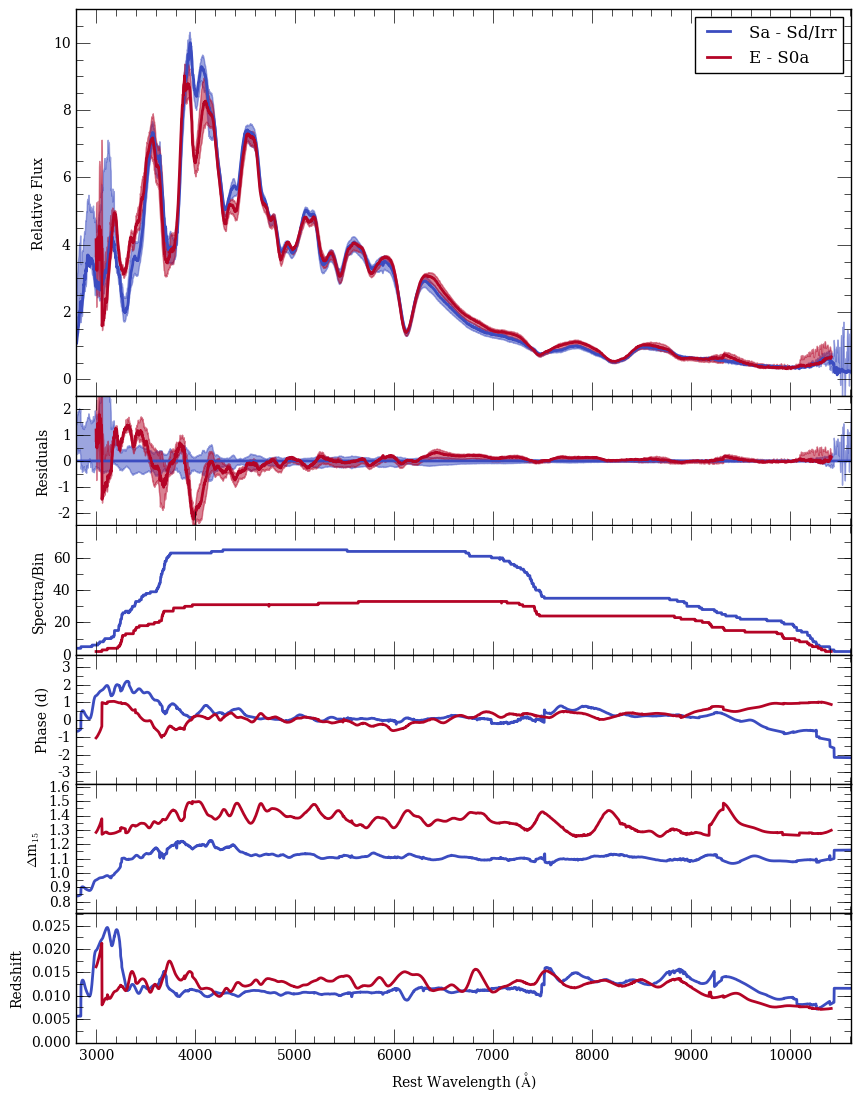

In [20]:
query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(comps_host_max, scale_type=True)
query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/all_dm15_host_max')
# query_db.stacked_plot(comps_host_max)

# Max-Low dm15 Matched

In [21]:
query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source < 1.1 or dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and morphology >= 7 and ((dm15_cfa < 1.1 or dm15_from_fits < 1.1))",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and morphology between 1 and 7 and ((dm15_cfa < 1.15 or dm15_from_fits < 1.15))"]

In [22]:
# comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source < 1.1 or dm15_from_fits < 1.1))
159 questionable files currently ignored
4 questionable spectra removed 108 spectra left
0 Peculiar Ias removed 108 spectra left
99 spectra with host corrections
159 questionable files currently ignored
40 valid SNe found
Arrays cleaned
40 spectra may have telluric contamination
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 0.998840596273 0.015177 bsnip 3124.0 11082.0 11.0
Host correction...
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.728371655089 0.013219 bsnip 3308.0 10018.0 14.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.460351148368 0.014443 bsnip 3344.0 10350.0 14.0
Host correction...
2001cp sn2001cp-20010629-ui.flm 24.0178237234 0.88 None 0.917447344588 0.022402 bsnip 3278.0 10124.0 13.0
Host correction...
2001eh sn2001eh

0.0442737566441
0.975275048083
-0.17485016307
1.00274313799


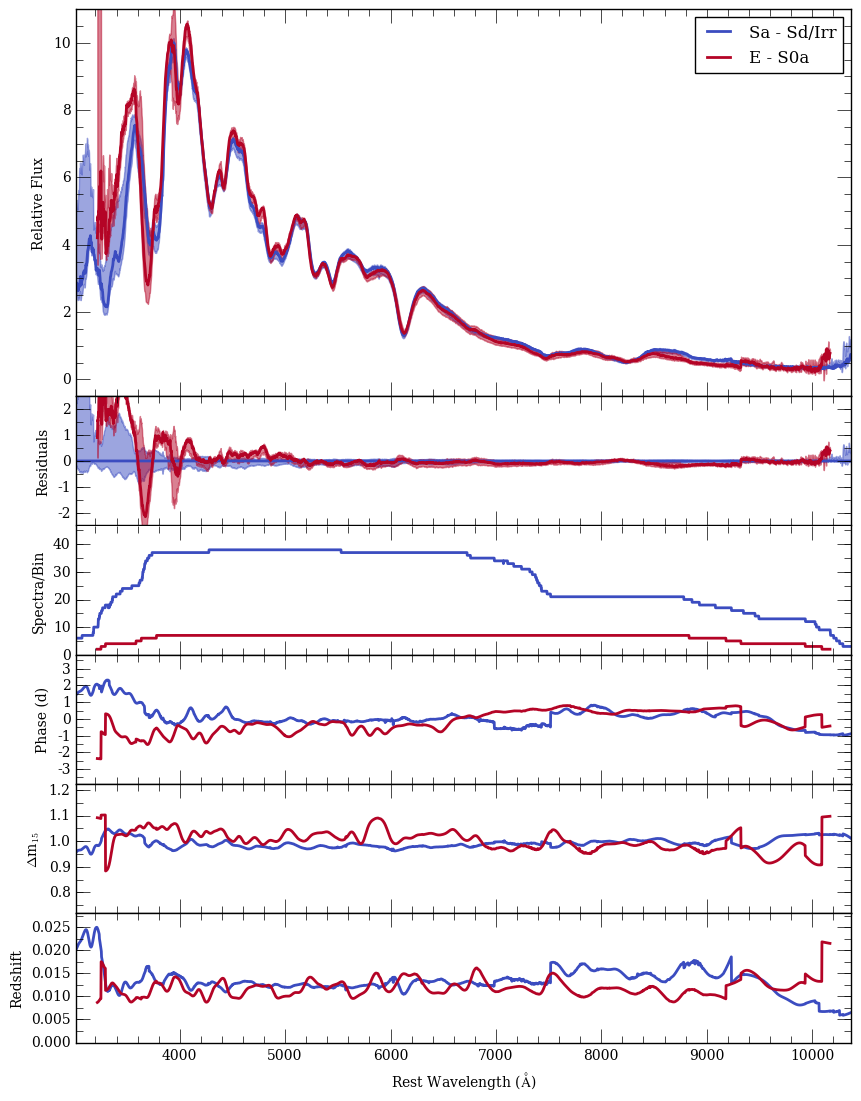

In [47]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/low_dm15_host_max')

# Max-High dm15 Matched

In [24]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [25]:
# comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
159 questionable files currently ignored
2 questionable spectra removed 56 spectra left
5 Peculiar Ias removed 51 spectra left
41 spectra with host corrections
159 questionable files currently ignored
10 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
2001ep sn2001ep-20011020-ui-corrected.flm 50.8449098727 1.3 None 2.68475189241 0.013129 bsnip 3308.0 10216.0 12.0
Host correction...
2003u sn2003U-20030204-ui.flm 29.2694201484 1.46 None -2.67712752871 0.028341 bsnip 3068.0 10064.0 15.0
Host correction...
1999cc sn1999cc-19990516.34-fast.flm 23.2075050712 1.35 None -1.14415588445 0.031328 cfa 3658.0 7262.0 14.0
Host correction...
2002hw sn2002hw-20021114.10-fast.flm 7.34338813404 1.44 None -2.94240492956 0.017535

0.995130241696
1.32394593012
0.414360438177
1.32336617516


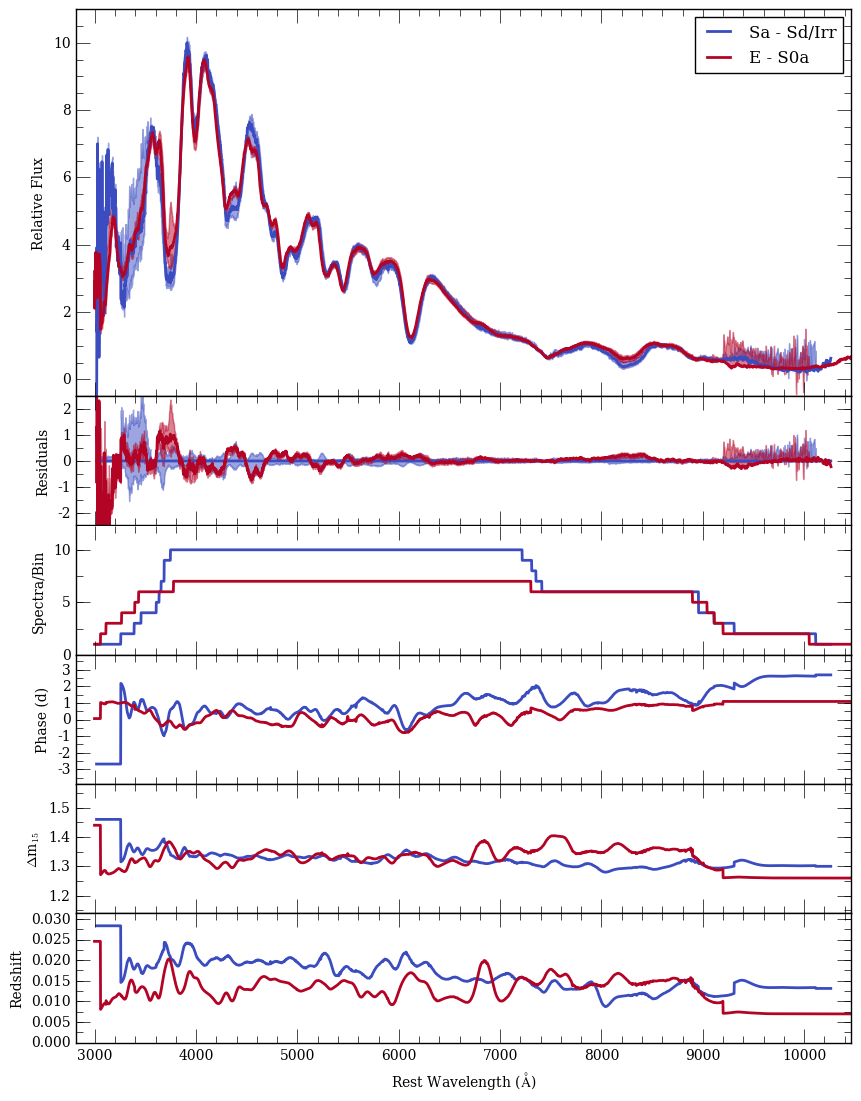

In [53]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/high_dm15_host_max')

# +1 Week-Low dm15 Matched

In [27]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [28]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
159 questionable files currently ignored
2 questionable spectra removed 32 spectra left
0 Peculiar Ias removed 32 spectra left
29 spectra with host corrections
159 questionable files currently ignored
19 valid SNe found
Arrays cleaned
19 spectra may have telluric contamination
1998v sn1998v-19980326-br.flm 83.5622224849 0.99 None 7.39102149597 0.017586 bsnip 3834.0 8992.0 12.0
Host correction...
2002ck sn2002ck-20020507-ui.flm 16.8804485373 1.08 None 5.22690374652 0.029864 bsnip 3256.0 10050.0 12.0
Host correction...
2006cf sn2006cf-20060523.291-ui.flm 6.46920039592 None 1.04621465431 5.5033258061 0.041552 bsnip 3238.0 10032.0 15.0
Host correction...
1994ae sn1994ae-19941204.53-fast.flm 94.6039568513 0.96 None 5.83709893594 0.004266 cfa 

6.33110914076
1.02423600724
6.91812109884
1.05837948721


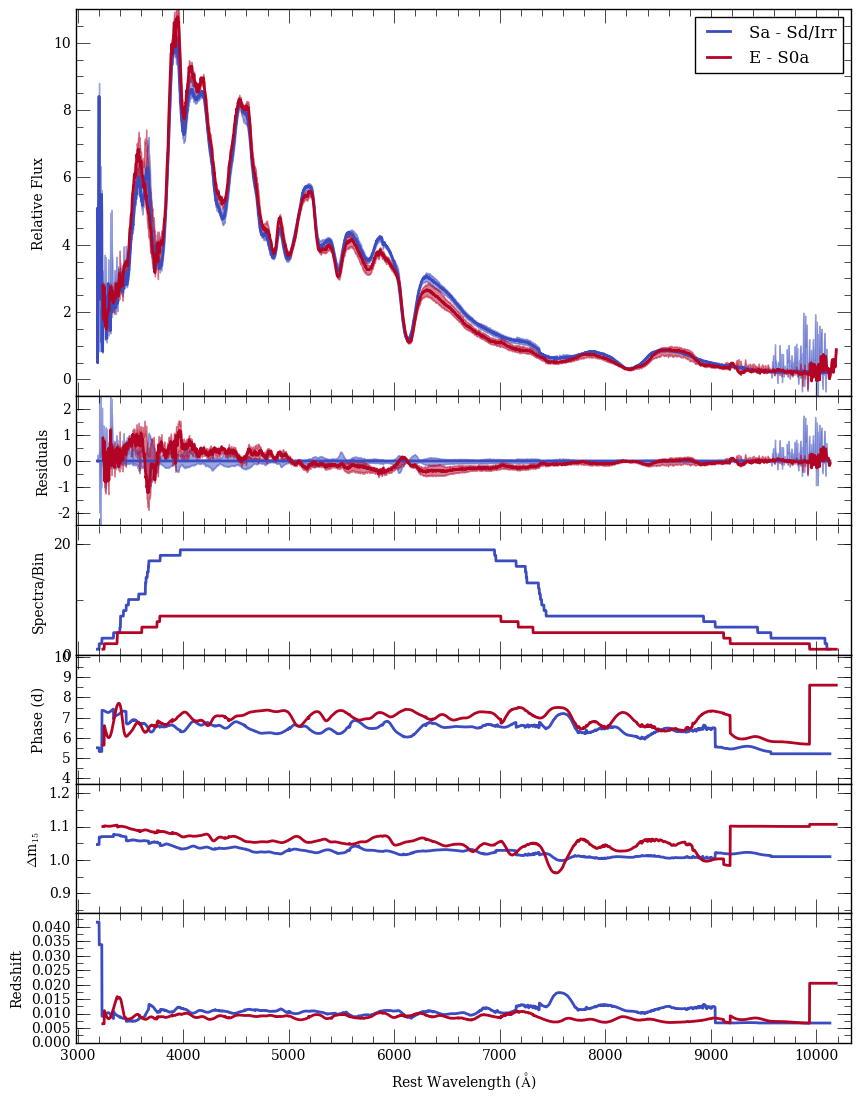

In [41]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/low_dm15_host_p1week')

# +1 Week-High dm15 Matched

In [30]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [31]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
159 questionable files currently ignored
1 questionable spectra removed 30 spectra left
0 Peculiar Ias removed 30 spectra left
25 spectra with host corrections
159 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
2001ep sn2001ep-20011025-ui-corrected.flm 37.8659769534 1.3 None 7.70484311474 0.013129 bsnip 3288.0 10216.0 12.0
Host correction...
2004ef sn2004ef-20040924.302-ui-corrected.flm 10.2041329015 1.39 None 7.99914644733 0.030985 bsnip 3272.0 10136.0 12.0
Host correction...
2005am sn2005am-20050311.302-br-corrected.flm 100.819468548 1.3 None 6.04326425565 0.007899 bsnip 3424.0 9138.0 10.0
Host correction...
2000cn sn2000cn-20000621.37-fast.flm 12.6184635707 1.51 None 8

6.76891484988
1.31708949259
7.63438071436
1.40264433778


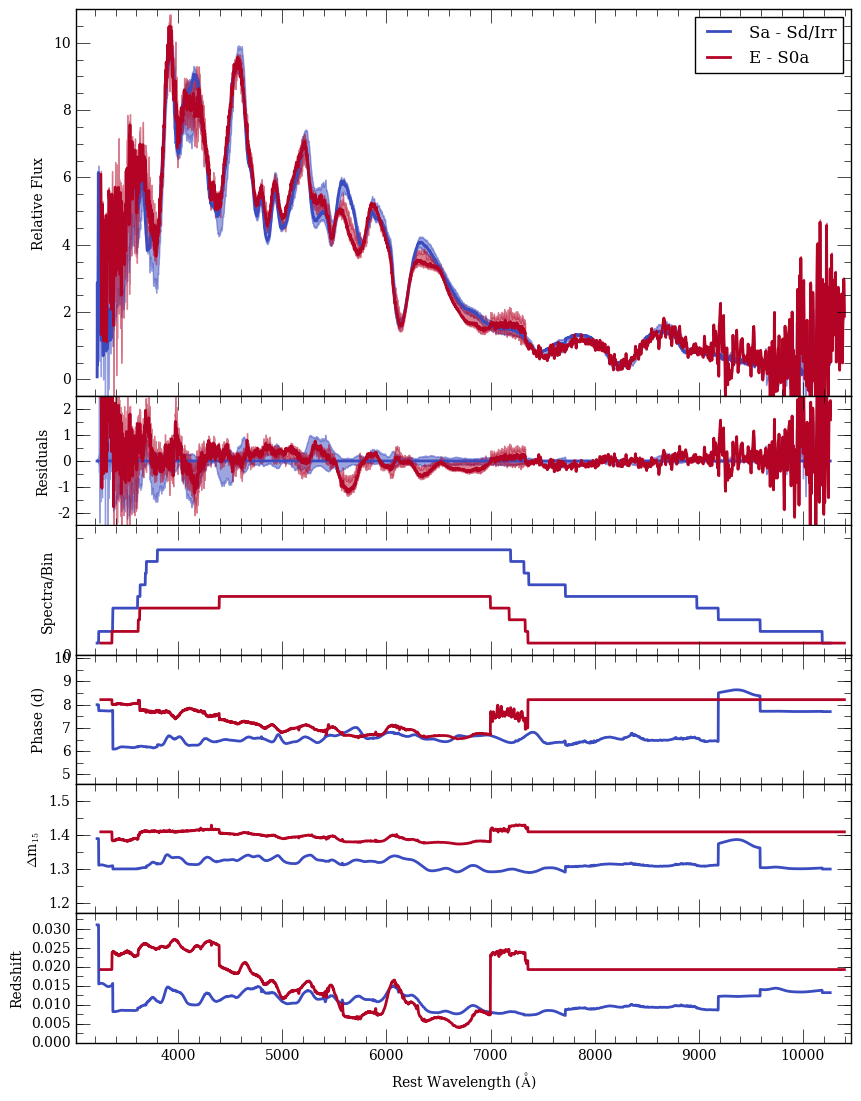

In [42]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/high_dm15_host_p1week')

# -1 Week-Low dm15 Matched

In [33]:
query_host_low_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [34]:
comps_host_low_dm15_m1week, sn_arrays_low_dm15_m1week, boot_sn_arrays_low_dm15_m1week = query_db.main(len(query_host_low_dm15_m1week), query_host_low_dm15_m1week, boot='b', medmean=1, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
159 questionable files currently ignored
2 questionable spectra removed 51 spectra left
0 Peculiar Ias removed 51 spectra left
49 spectra with host corrections
159 questionable files currently ignored
20 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
1998dk sn1998dk-19980824-90-br.flm 28.9891747848 1.05 None -7.42682480293 0.013219 bsnip 3308.0 9920.0 14.0
Host correction...
2001ba sn2001ba-20010430-ui.flm 1.15979701013 None 1.01502222659 -5.12550543583 0.029557 bsnip 3218.0 10246.0 13.0
Host correction...
2004ey sn2004ey-20041018-br.flm 79.4004046295 None 0.969286867038 -7.04085309307 0.015786 bsnip 3044.0 9204.0 14.0
Host correction...
2006ax sn2006ax-20060322.396-ui.flm 33.3853454623 1.06 None -9.891427396

-7.19950008523
1.02715132784
-6.63777750347
1.02664206146


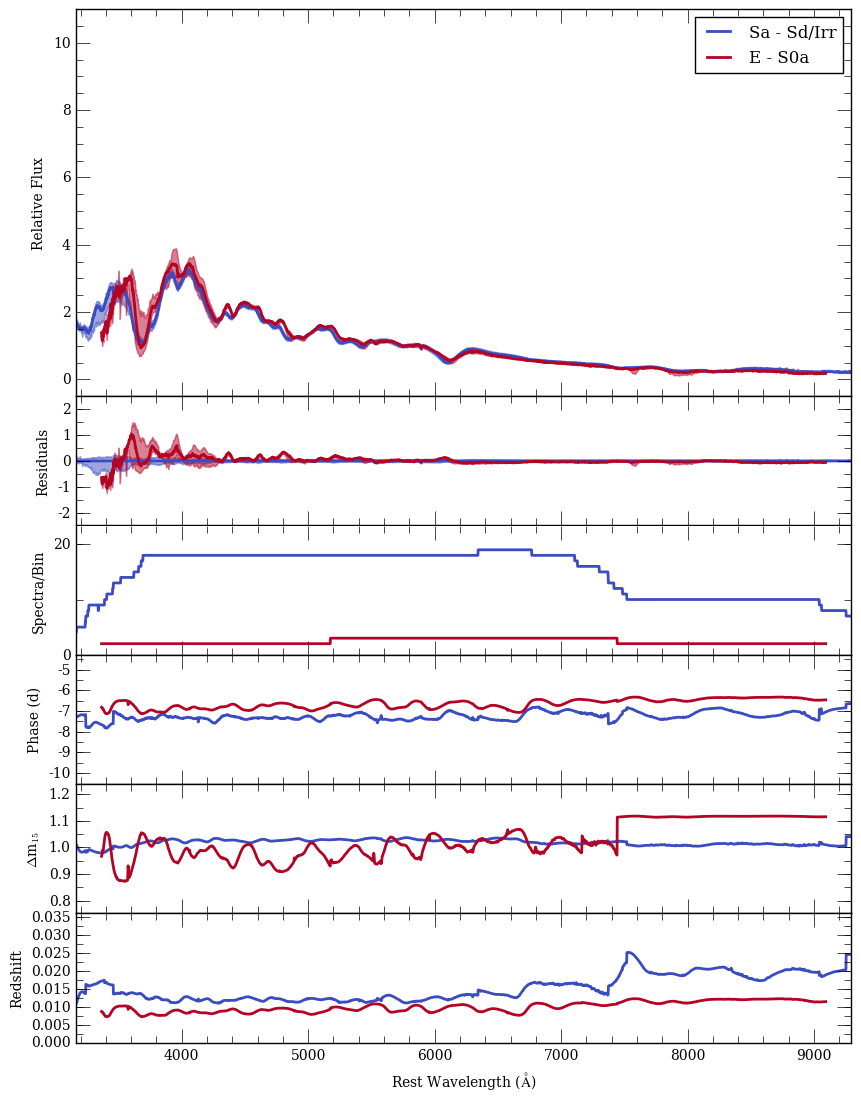

In [43]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_m1week, scale_type=False, min_num_show=2, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/low_dm15_host_m1week')

In [36]:
query_host_high_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [37]:
comps_host_high_dm15_m1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_m1week), query_host_high_dm15_m1week, boot='b', medmean=1, selection='max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
159 questionable files currently ignored
1 questionable spectra removed 42 spectra left
6 Peculiar Ias removed 36 spectra left
28 spectra with host corrections
159 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
2002hw sn2002hw-20021111-br.flm 42.7660070151 1.44 None -5.98898317994 0.017535 bsnip 3092.0 9196.0 14.0
Host correction...
2004ef sn2004ef-20040910.310-ui-corrected.flm 29.0163369435 1.39 None -5.57234101369 0.030985 bsnip 3262.0 10136.0 12.0
Host correction...
2004eo sn2004eo-20040924.242-ui.flm 38.5533670767 None 1.50924330216 -5.31947886238 0.015701 bsnip 3320.0 10288.0 11.0
Host correction...
2007bd sn2007bd-20070410.254-ui.flm 14.1729323948 1.3 None -5.9374

-6.09054453306
1.38412722356
-5.62927796204
1.37816254716


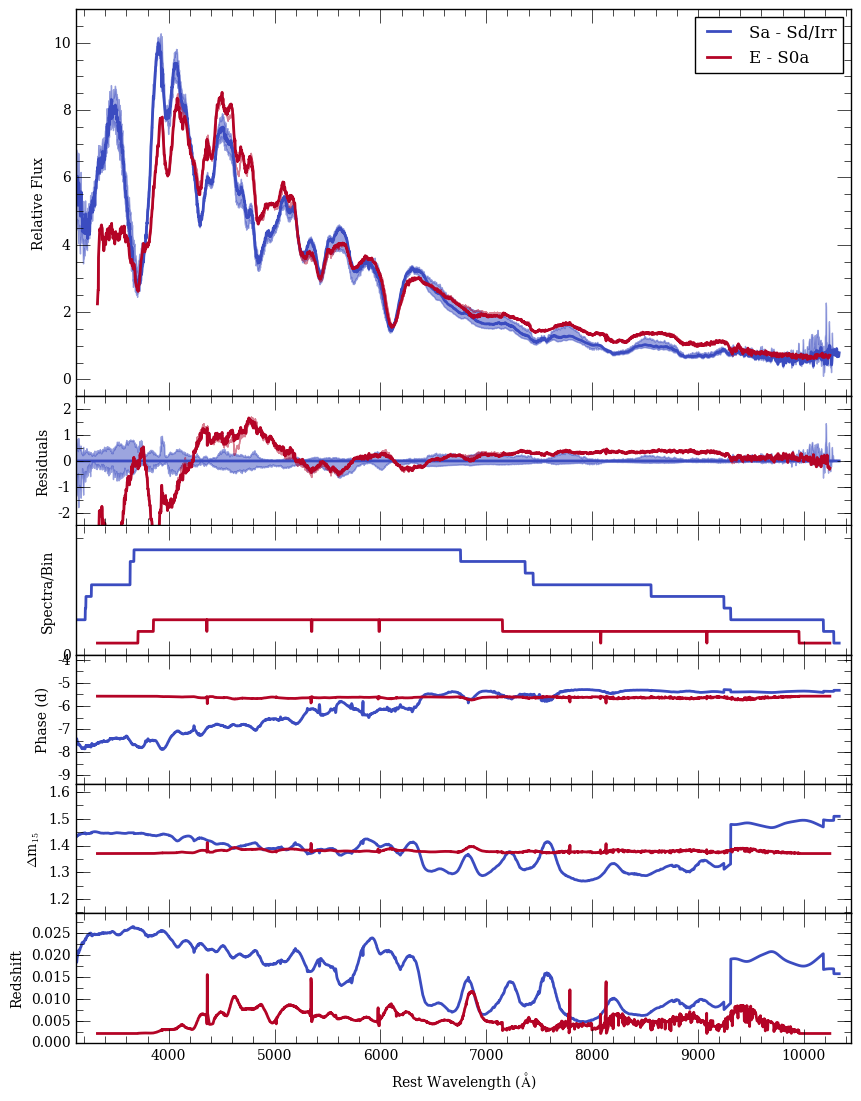

In [44]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_m1week, scale_type=False, min_num_show=1, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites/high_dm15_host_m1week')